In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
ratings = pd.read_csv("D:\Crack\Book_rating.csv")
books = pd.read_csv("D:\Crack\Books_data.csv")
print(ratings.shape)
print(books.shape)

(518659, 10)
(212404, 10)


In [5]:
ratings.head(1)

Id                           Title  Price        User_id  \
0  1882931173  Its Only Art If Its Well Hung!    NaN  AVCGYZL8FQQTD   

             profileName review_helpfulness  review_score  review_time  \
0  Jim of Oz "jim-of-oz"                7/7             4    940636800   

                           review_summary  \
0  Nice collection of Julie Strain images   

                                         review_text  
0  This is only for Julie Strain fans. It's a col...

In [6]:
books.head(1)

Title description           authors  \
0  Its Only Art If Its Well Hung!         NaN  ['Julie Strain']   

                                               image  \
0  http://books.google.com/books/content?id=DykPA...   

                                         previewLink publisher publishedDate  \
0  http://books.google.nl/books?id=DykPAAAACAAJ&d...       NaN          1996   

                                            infoLink  \
0  http://books.google.nl/books?id=DykPAAAACAAJ&d...   

                    categories  ratingsCount  
0  ['Comics & Graphic Novels']           NaN

# **Data Pre-Processing**

In [7]:
# Merging both the dataset 
data = pd.merge(ratings,books, on = 'Title')
data.shape

(518659, 19)

In [8]:
#extracting usefull columns for our analysis
data = data[['Title','review_score','review_text','authors','categories','ratingsCount']]

In [9]:
# Dropping Duplicates
data.drop_duplicates(inplace = True)
data.shape

(501079, 6)

In [10]:
data.isna().sum()

Title               31
review_score         0
review_text          0
authors          66444
categories       92100
ratingsCount    232543
dtype: int64

In [11]:
# Dropping Null Values
data.dropna(inplace = True)
data.isna().sum()

Title           0
review_score    0
review_text     0
authors         0
categories      0
ratingsCount    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254328 entries, 4 to 518656
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Title         254328 non-null  object 
 1   review_score  254328 non-null  int64  
 2   review_text   254328 non-null  object 
 3   authors       254328 non-null  object 
 4   categories    254328 non-null  object 
 5   ratingsCount  254328 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 13.6+ MB


In [13]:
data.head(1)

Title  review_score  \
4  The Church of Christ: A Biblical Ecclesiology ...             4   

                                         review_text               authors  \
4  This book is a continual resource. It is so bi...  ['Everett Ferguson']   

     categories  ratingsCount  
4  ['Religion']           5.0

In [14]:
# Using only the fraction of dataset to reduce the running time on big data
data = data.sample(50000)
data.shape

(50000, 6)

In [15]:
# Removes bractes and colons from authors name
data['authors'] = data['authors'].str.extract(r'\'(.*)\'')
# Removes bractes and colons from categories
data['categories'] = data['categories'].str.extract(r'\'(.*)\'')
# Counting the length of the each review
data['word_count'] = data['review_text'].apply(lambda x: len(x.split(' ')))

data.head()

Title  review_score  \
104424                                  Desolation Angels             5   
349302                               The Shah's Last Ride             1   
129008  God's Wisdom for Little Boys: Character-Buildi...             5   
449028  Ten Little Dinosaurs (Eyeball Animation): Boar...             5   
192469            Harry Potter and the Chamber of Secrets             1   

                                              review_text  \
104424  it takes me only two sentences to completely f...   
349302  This book is a compilation of many newspaper a...   
129008  This book is most wonderful. My little son and...   
449028  This is the best little book I have picked up ...   
192469  I read a portion of the book. It took SO Long!...   

                               authors           categories  ratingsCount  \
104424                    Jack Kerouac              Fiction           7.0   
349302               William Shawcross                 Iran           1.0   
129008  Jim George', 'Elizabeth George  Juvenile Nonfiction           8.0   
449028               Pattie Schnetzler  Juvenile Nonfiction           7.0   
192469                   J. K. Rowling     Juvenile Fiction          14.0   

        word_count  
104424          72  
349302          74  
129008          95  
449028          58  
192469         142

# **EDA**

# Most number of books in each genres

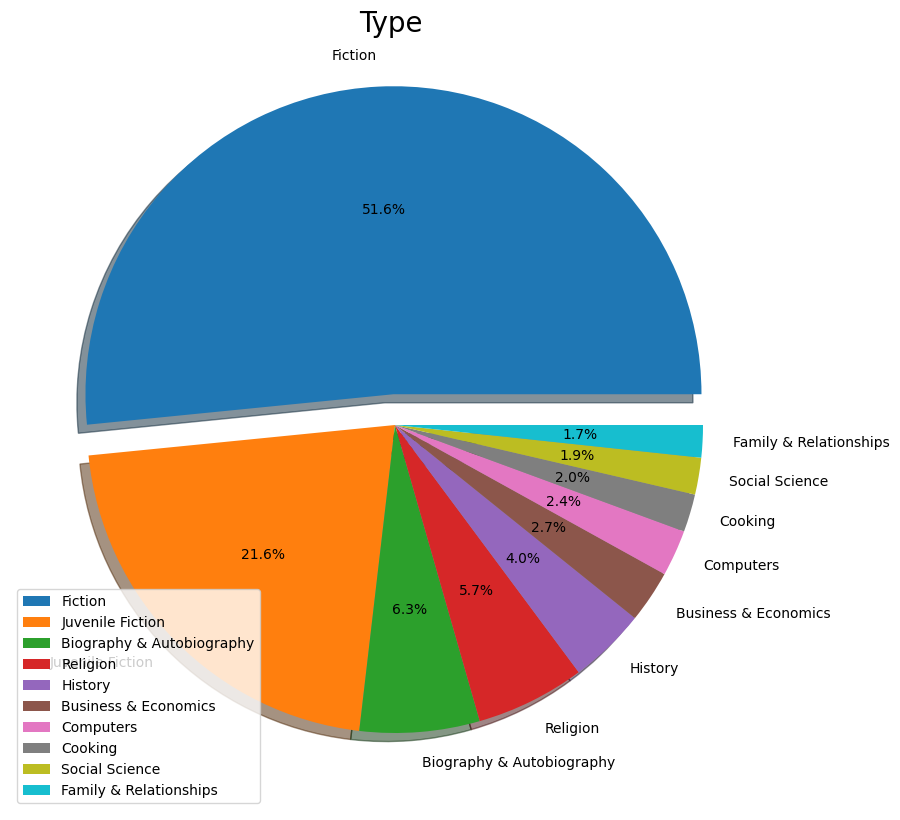

In [16]:
plt.rcParams['figure.figsize'] = (10, 10)
labels=['Fiction','Juvenile Fiction','Biography & Autobiography','Religion','History','Business & Economics','Computers','Cooking','Social Science','Family & Relationships']
plt.pie(data['categories'].value_counts().head(10),explode=(0.1,0,0,0,0,0,0,0,0,0), labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Type ', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

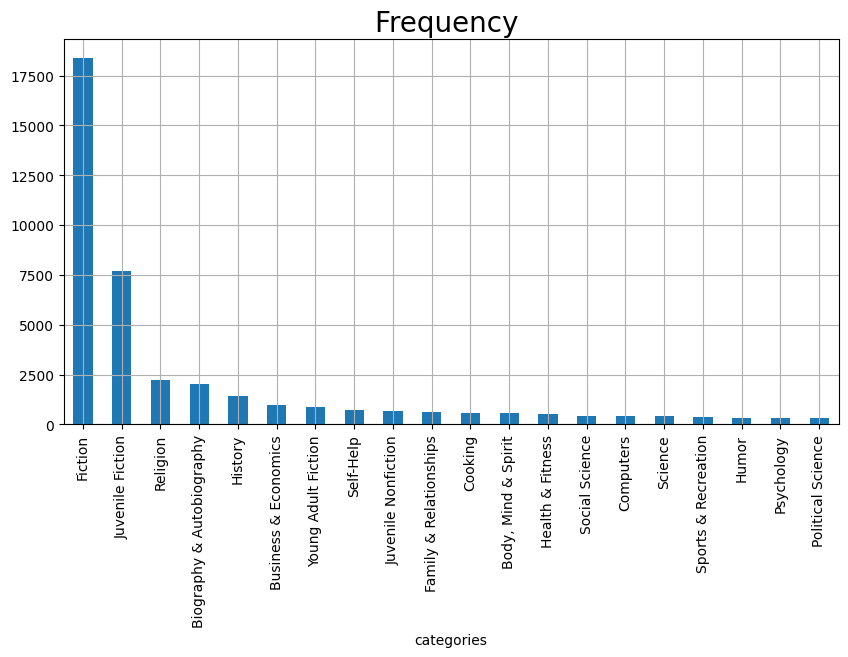

In [17]:
data['categories'].value_counts().head(20).sort_values(ascending = False).plot(kind='bar', figsize=(10,5))
plt.title('Frequency ', fontsize = 20)
plt.grid()
plt.show()

# Most frequent Words in over 3 rated Reiews

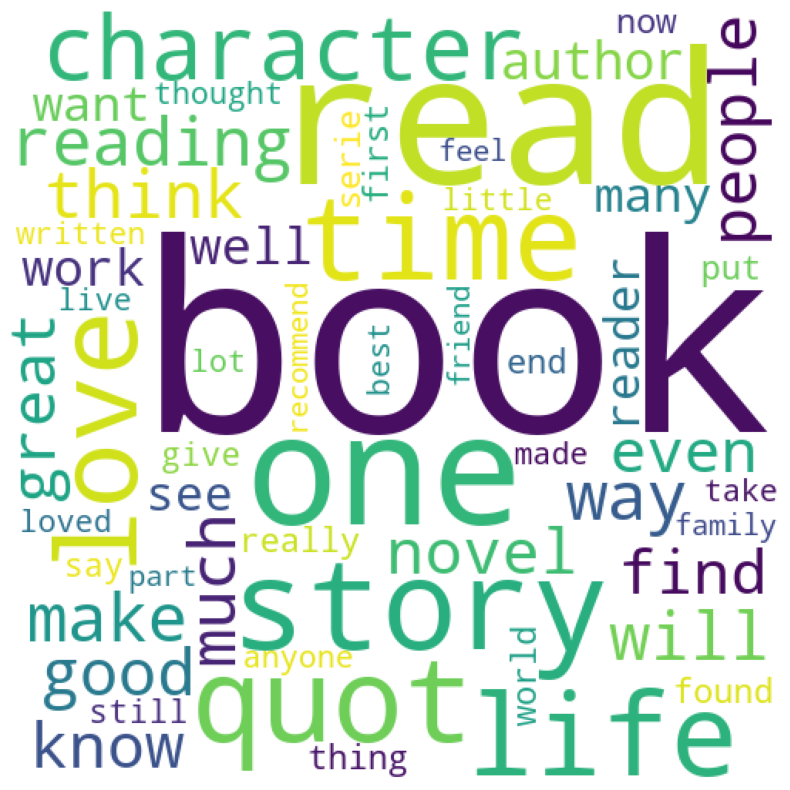

In [18]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
spam_wc = wc.generate(data[data['review_score'] > 3]['review_text'].str.cat(sep=" "))

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(spam_wc)

# Most frequent Words in less than 2 rated Reiews

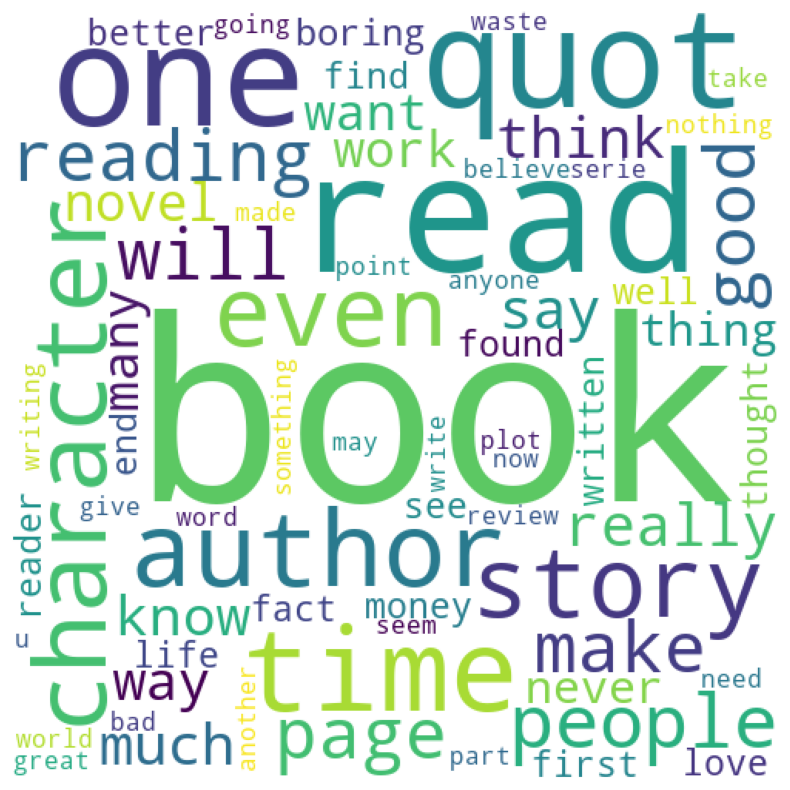

In [19]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
spam_wc = wc.generate(data[data['review_score'] < 2]['review_text'].str.cat(sep=" "))

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(spam_wc)

# Most Reviewed Books

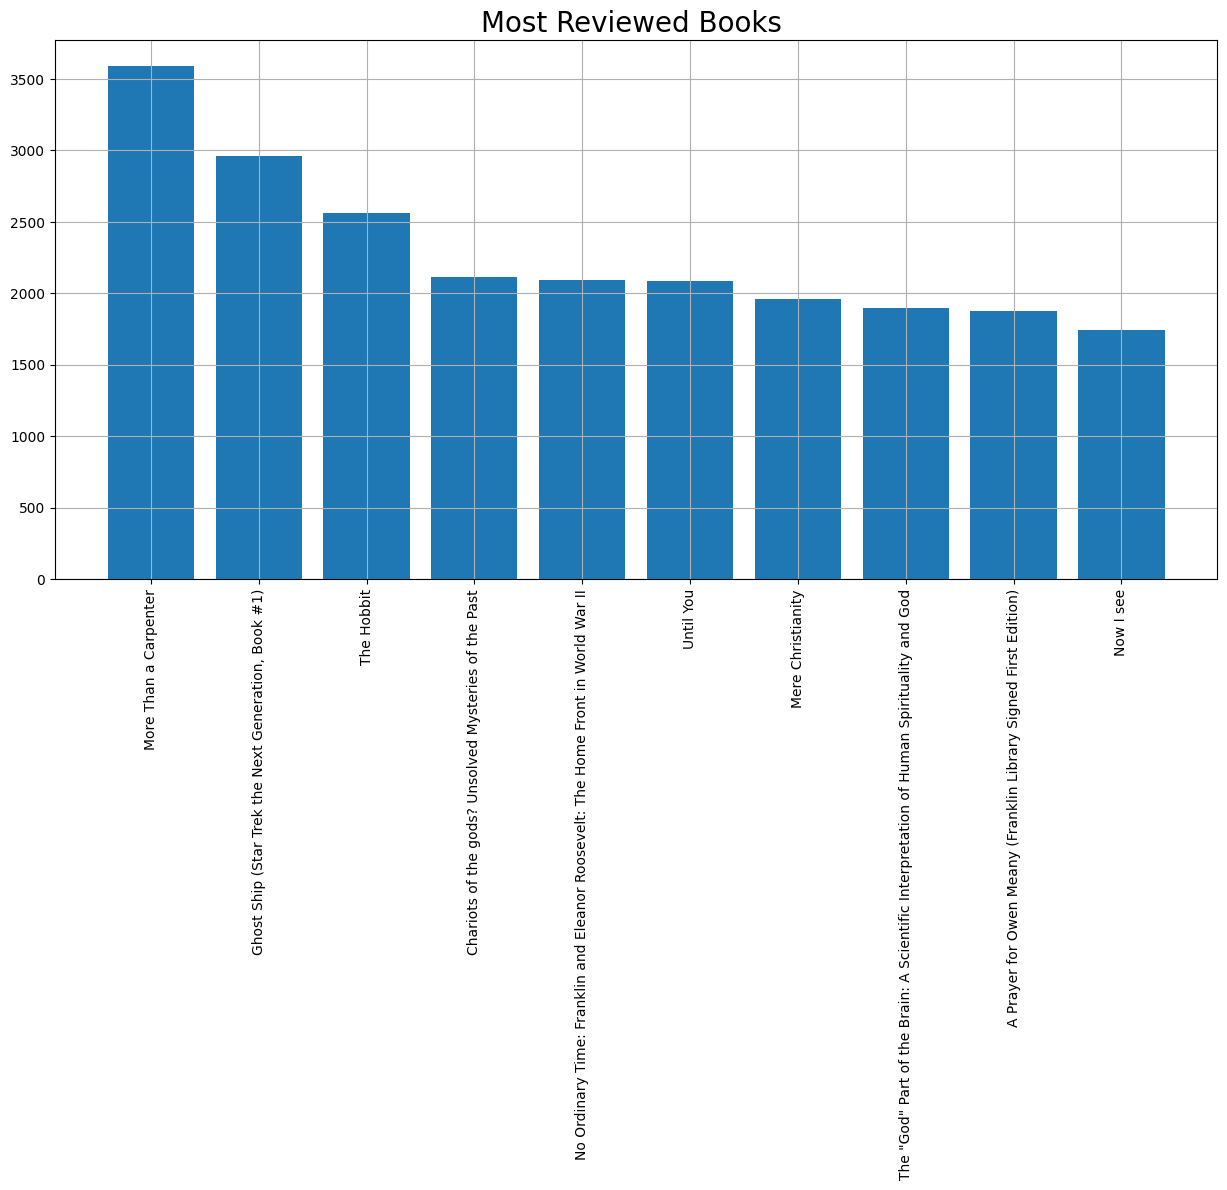

In [20]:
plt.figure(figsize = (15,7))
cou = data[data['word_count'] > 1707][['Title','word_count']].sort_values(ascending = False, by = 'word_count')
plt.bar(cou['Title'], cou['word_count'])
plt.title('Most Reviewed Books ', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

# Higest Rated Books with over 3000 ratings each Book

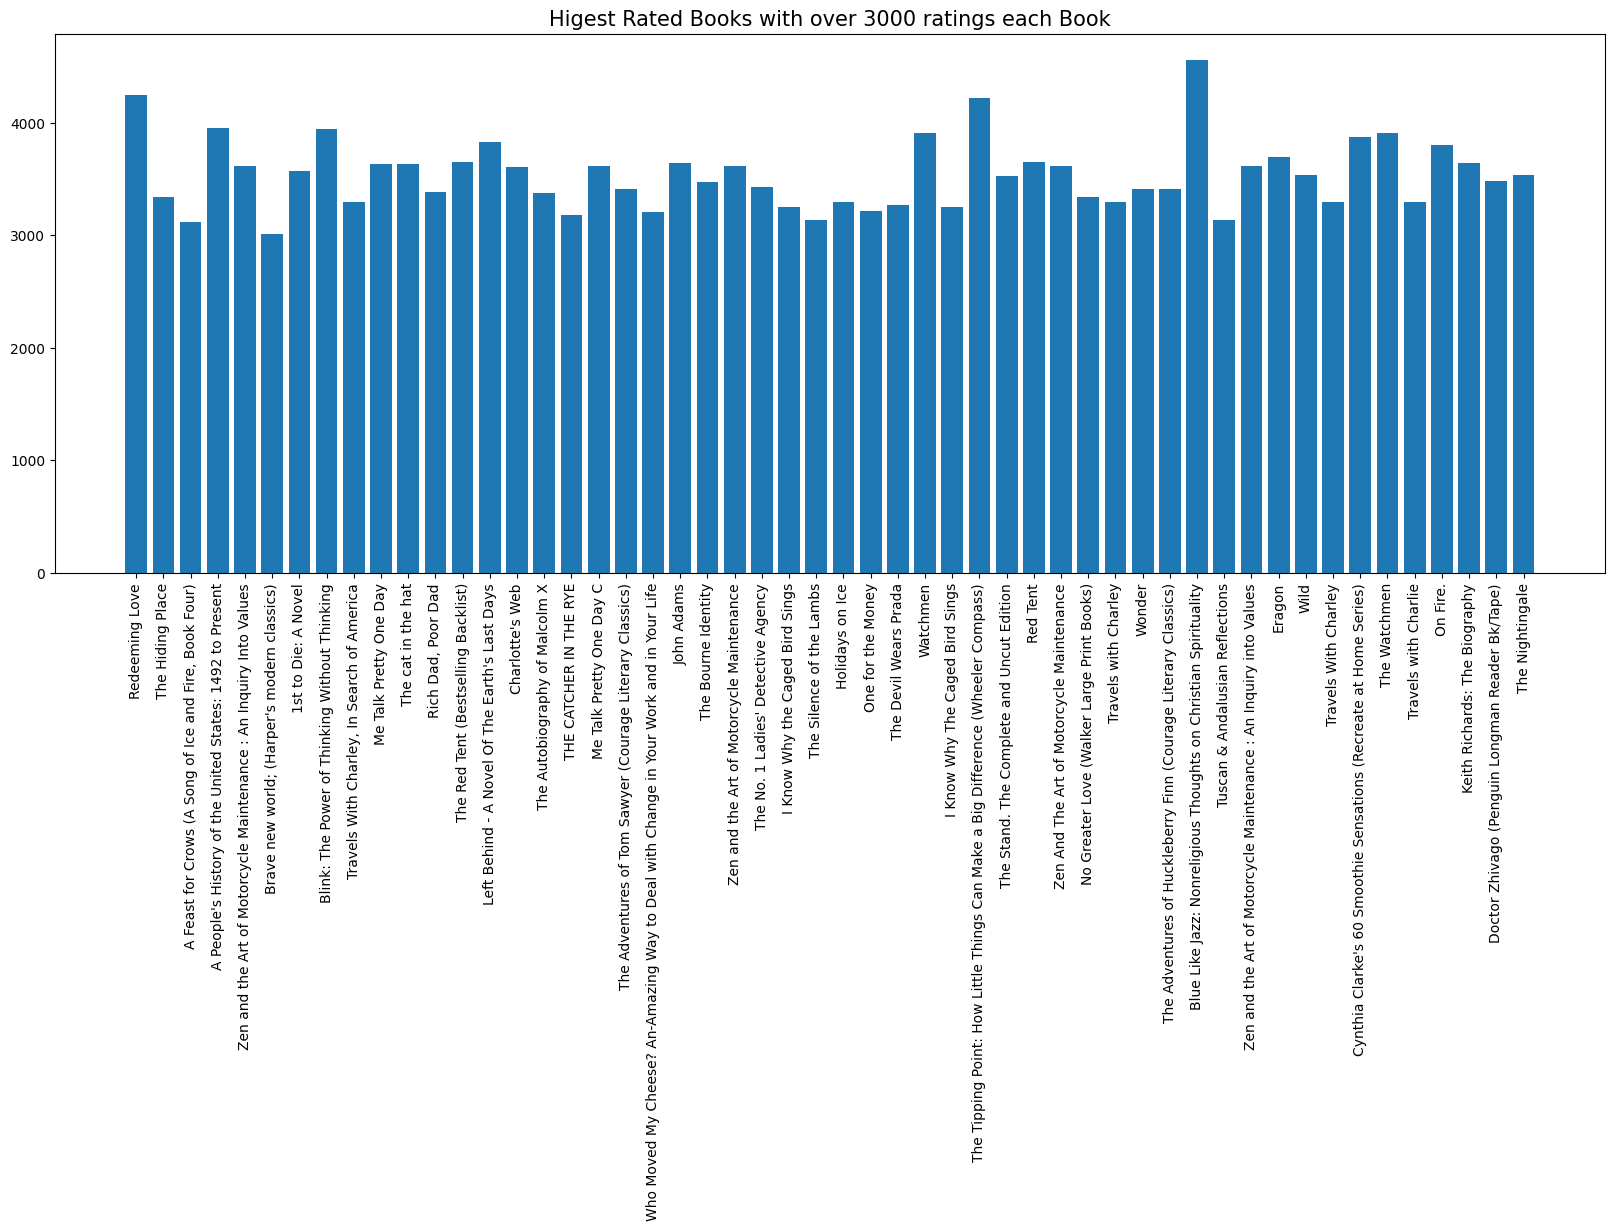

In [21]:
plt.figure(figsize = (20, 7))
rating_counts = data[data['ratingsCount'] > 3000][['Title','ratingsCount']].drop_duplicates()
plt.bar(rating_counts['Title'],rating_counts['ratingsCount'])
plt.title('Higest Rated Books with over 3000 ratings each Book', fontsize = 15)
plt.xticks(rotation  = 'vertical')
plt.show()

# Number of Books written by the Authors

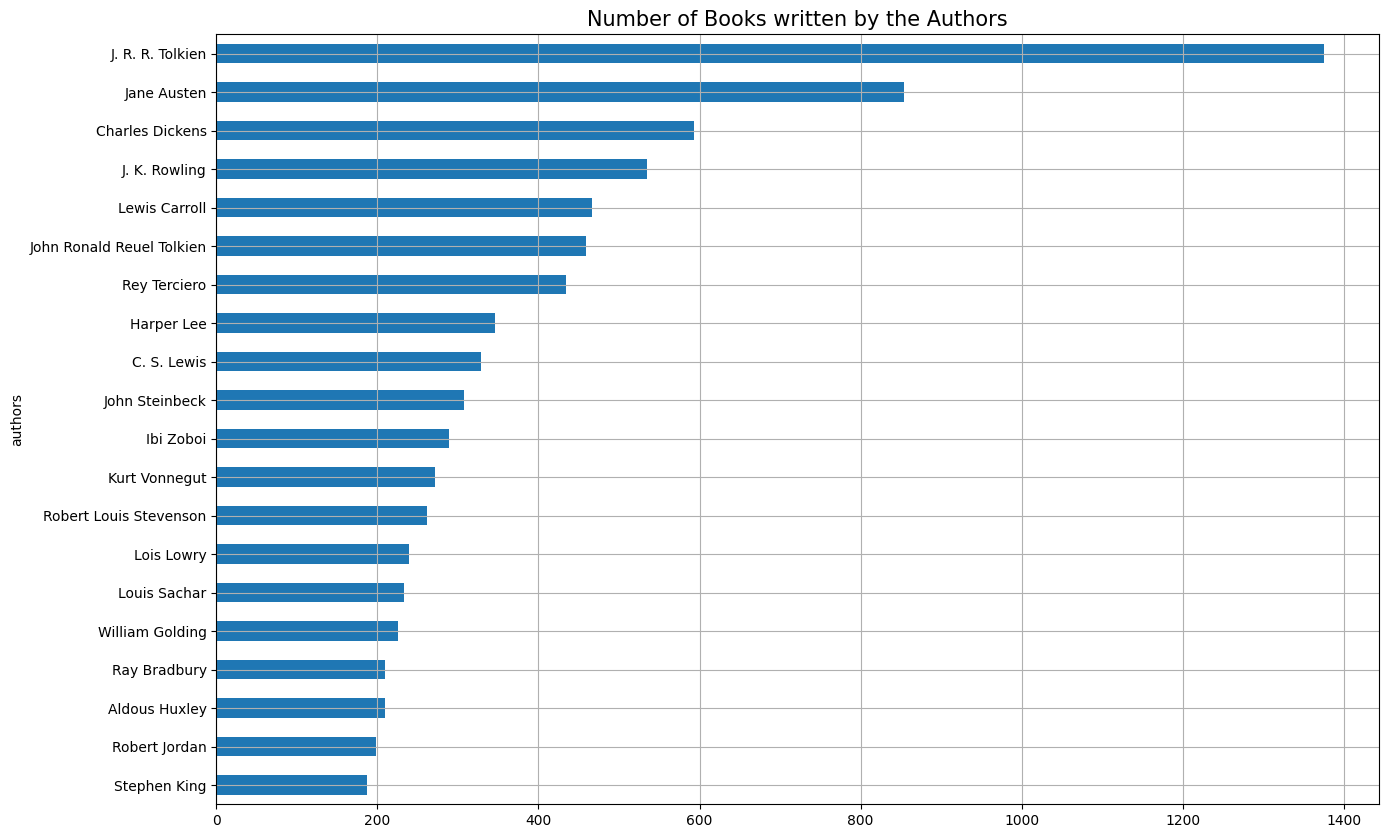

In [22]:
data['authors'].value_counts().head(20).sort_values(ascending = True).plot(kind='barh', figsize=(15,10))
plt.title('Number of Books written by the Authors', fontsize = 15)
plt.grid(visible=True, which='both')
plt.show()

# **Sentiment Analysis**

In [23]:
!pip install vaderSentiment

In [24]:
# Library for sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [25]:
# Lower casing the reviews
data['clean_reviews'] = data['review_text'].str.lower()
# Calculating Polarity score of reviews
data['score'] = data['clean_reviews'].apply(lambda review: vader.polarity_scores(review))
# Extracting compound column
data['compound']  = data['score'].apply(lambda score_dict: score_dict['compound'])

In [26]:
data.head(2)

Title  review_score  \
104424     Desolation Angels             5   
349302  The Shah's Last Ride             1   

                                              review_text            authors  \
104424  it takes me only two sentences to completely f...       Jack Kerouac   
349302  This book is a compilation of many newspaper a...  William Shawcross   

       categories  ratingsCount  word_count  \
104424    Fiction           7.0          72   
349302       Iran           1.0          74   

                                            clean_reviews  \
104424  it takes me only two sentences to completely f...   
349302  this book is a compilation of many newspaper a...   

                                                    score  compound  
104424  {'neg': 0.048, 'neu': 0.807, 'pos': 0.145, 'co...    0.7895  
349302  {'neg': 0.0, 'neu': 0.926, 'pos': 0.074, 'comp...    0.7003

In [27]:
# if compound value is more than 0.05 then it precive as positive
# if compound value is less than -0.0 then it precive as negative
# if compound value is equal to 0.0 then it precive as neutral

data['Sentiment'] = data['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x < -0.05 else 'neutral')
data.head()

Title  review_score  \
104424                                  Desolation Angels             5   
349302                               The Shah's Last Ride             1   
129008  God's Wisdom for Little Boys: Character-Buildi...             5   
449028  Ten Little Dinosaurs (Eyeball Animation): Boar...             5   
192469            Harry Potter and the Chamber of Secrets             1   

                                              review_text  \
104424  it takes me only two sentences to completely f...   
349302  This book is a compilation of many newspaper a...   
129008  This book is most wonderful. My little son and...   
449028  This is the best little book I have picked up ...   
192469  I read a portion of the book. It took SO Long!...   

                               authors           categories  ratingsCount  \
104424                    Jack Kerouac              Fiction           7.0   
349302               William Shawcross                 Iran           1.0   
129008  Jim George', 'Elizabeth George  Juvenile Nonfiction           8.0   
449028               Pattie Schnetzler  Juvenile Nonfiction           7.0   
192469                   J. K. Rowling     Juvenile Fiction          14.0   

        word_count                                      clean_reviews  \
104424          72  it takes me only two sentences to completely f...   
349302          74  this book is a compilation of many newspaper a...   
129008          95  this book is most wonderful. my little son and...   
449028          58  this is the best little book i have picked up ...   
192469         142  i read a portion of the book. it took so long!...   

                                                    score  compound Sentiment  
104424  {'neg': 0.048, 'neu': 0.807, 'pos': 0.145, 'co...    0.7895  positive  
349302  {'neg': 0.0, 'neu': 0.926, 'pos': 0.074, 'comp...    0.7003  positive  
129008  {'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'comp...    0.9800  positive  
449028  {'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'comp...    0.9538  positive  
192469  {'neg': 0.063, 'neu': 0.834, 'pos': 0.103, 'co...    0.8101  positive

# Distribution of Negative, Neutral and Positive Sentiment in whole corpus

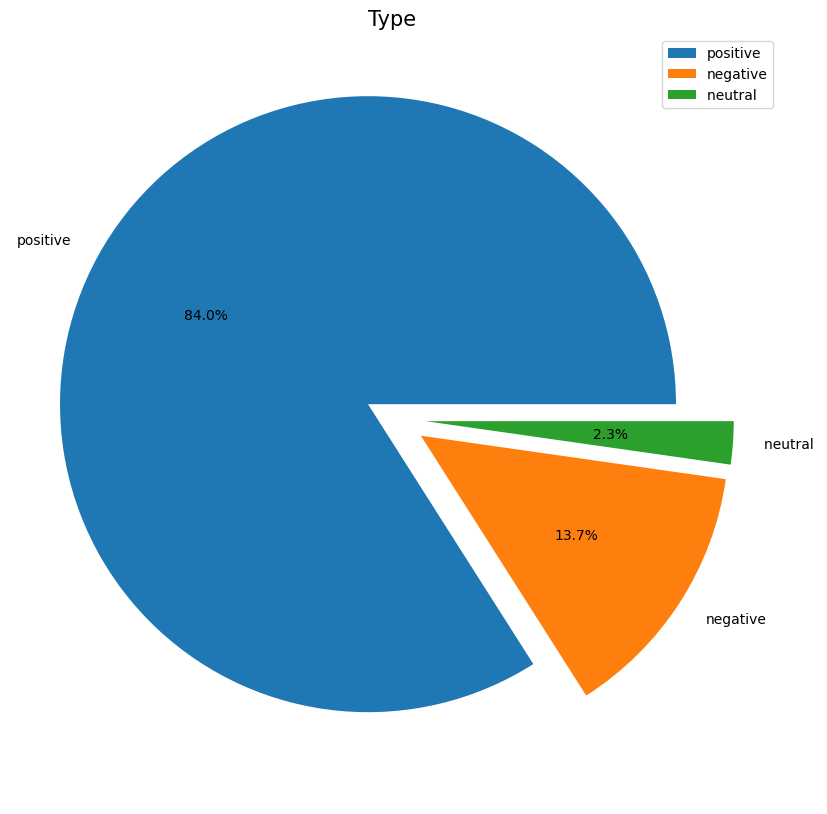

In [28]:
plt.rcParams['figure.figsize'] = (10, 10)
labels=['positive','negative','neutral ']
plt.pie(data['Sentiment'].value_counts(),explode =(0.1,0.1,0.1), labels=labels,autopct='%1.1f%%')
plt.title('Type ', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

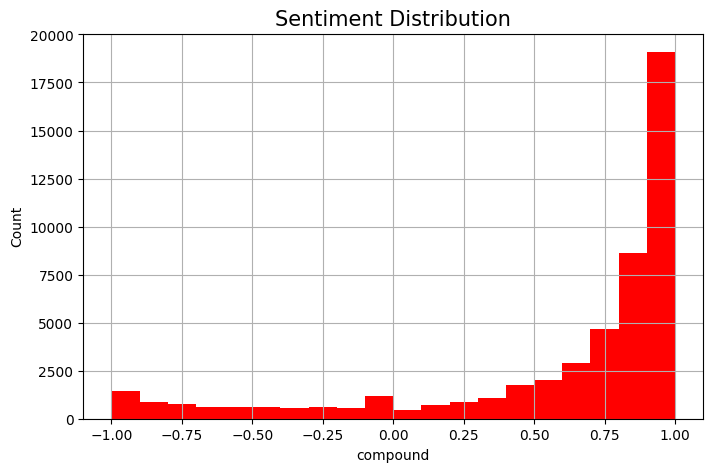

In [29]:
plt.figure(figsize = (8,5))
plt.hist(data['compound'],bins = 20,color = 'red')
plt.title('Sentiment Distribution',fontsize = 15)
plt.xlabel('compound')
plt.ylabel('Count')
plt.grid()
plt.show()

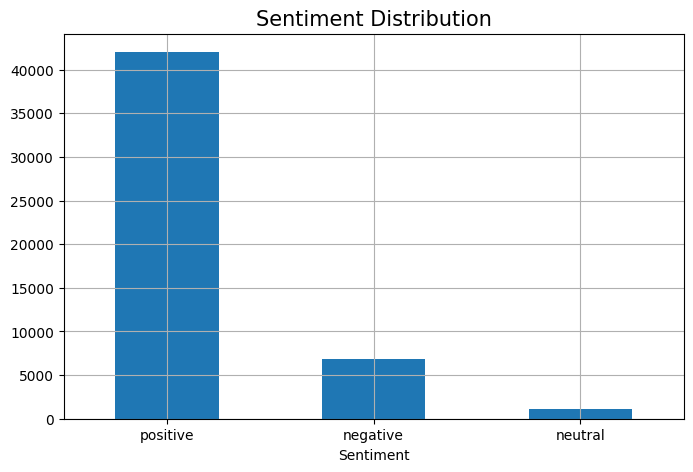

In [30]:
data['Sentiment'].value_counts().plot(kind = 'bar', figsize = (8,5))
plt.xticks(rotation = 'horizontal')
plt.title('Sentiment Distribution',fontsize = 15)
plt.grid()
plt.show()

# Most number of **Positive** Reviews on the Books

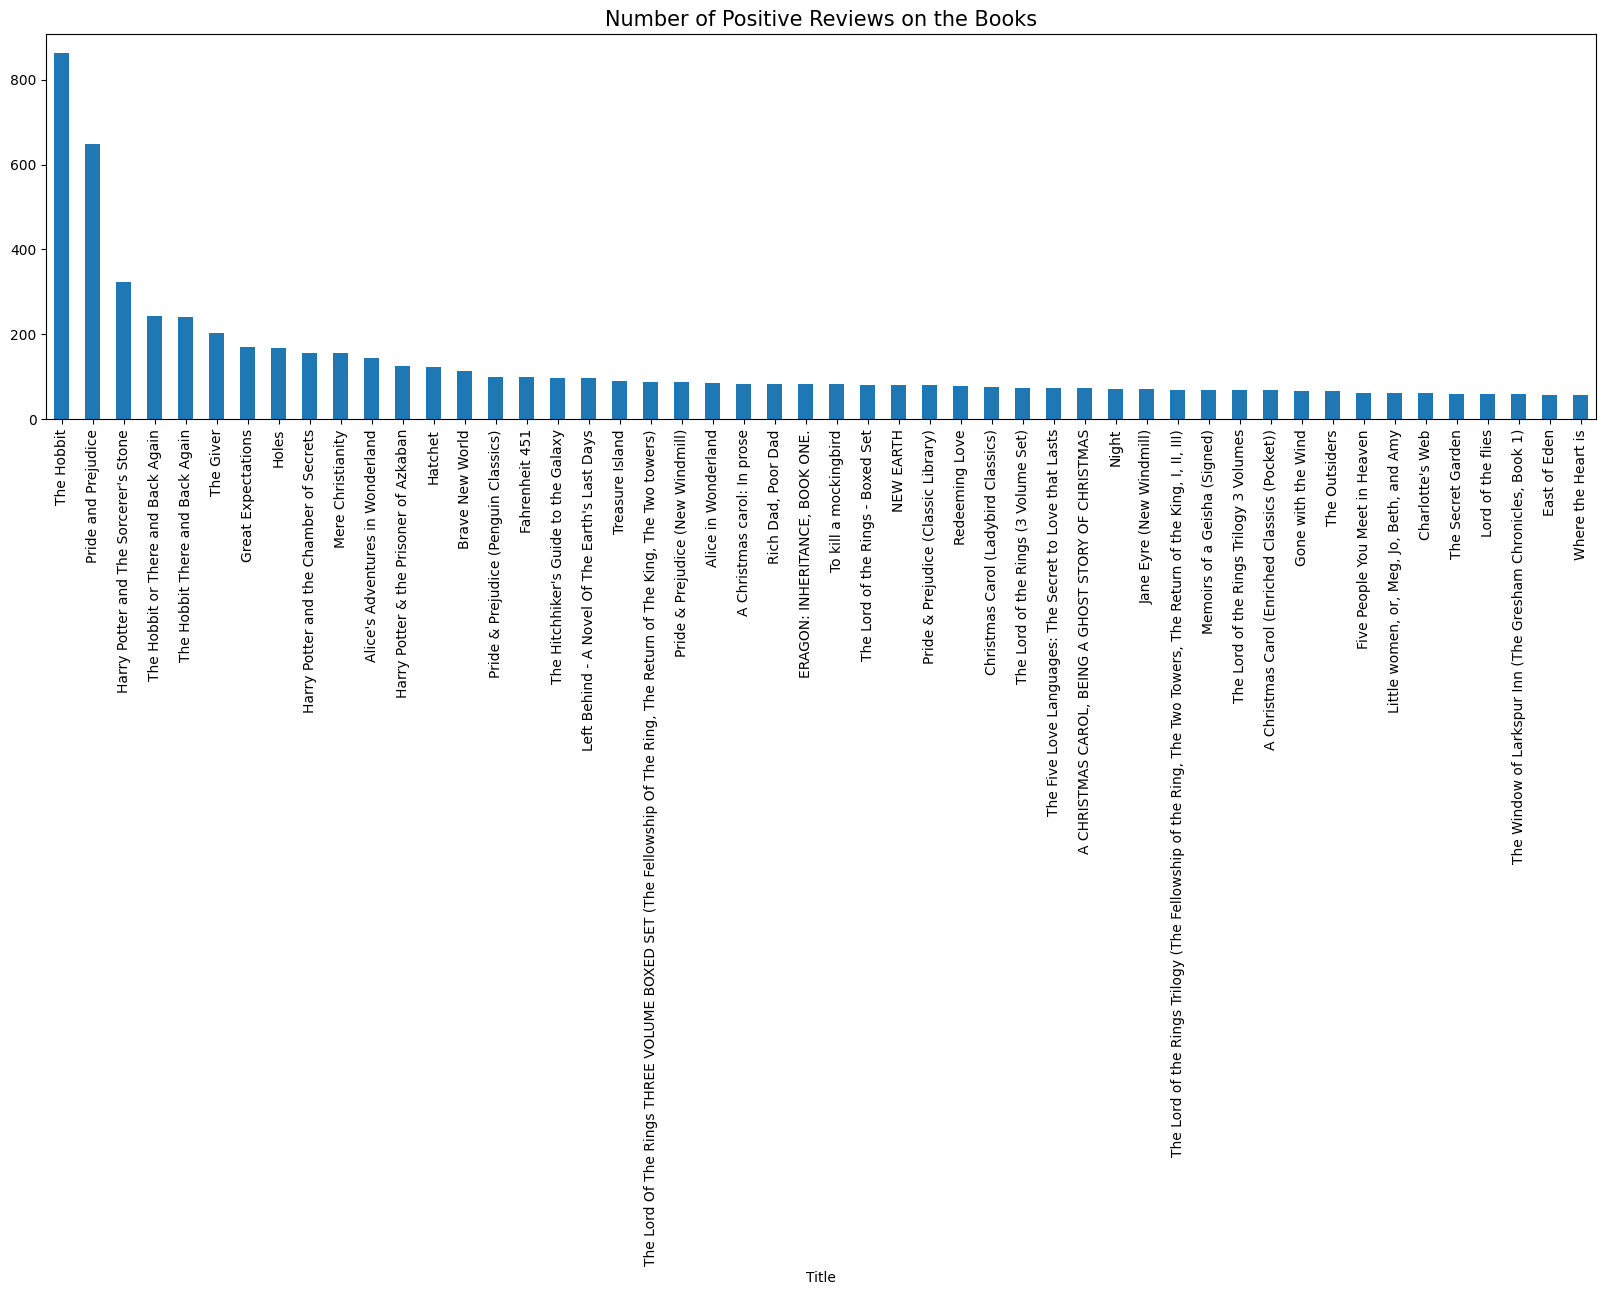

In [31]:
data[data['Sentiment'] == 'positive']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (20,5))
plt.title('Number of Positive Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

# Most number of **Neutral** Reviews on the Books

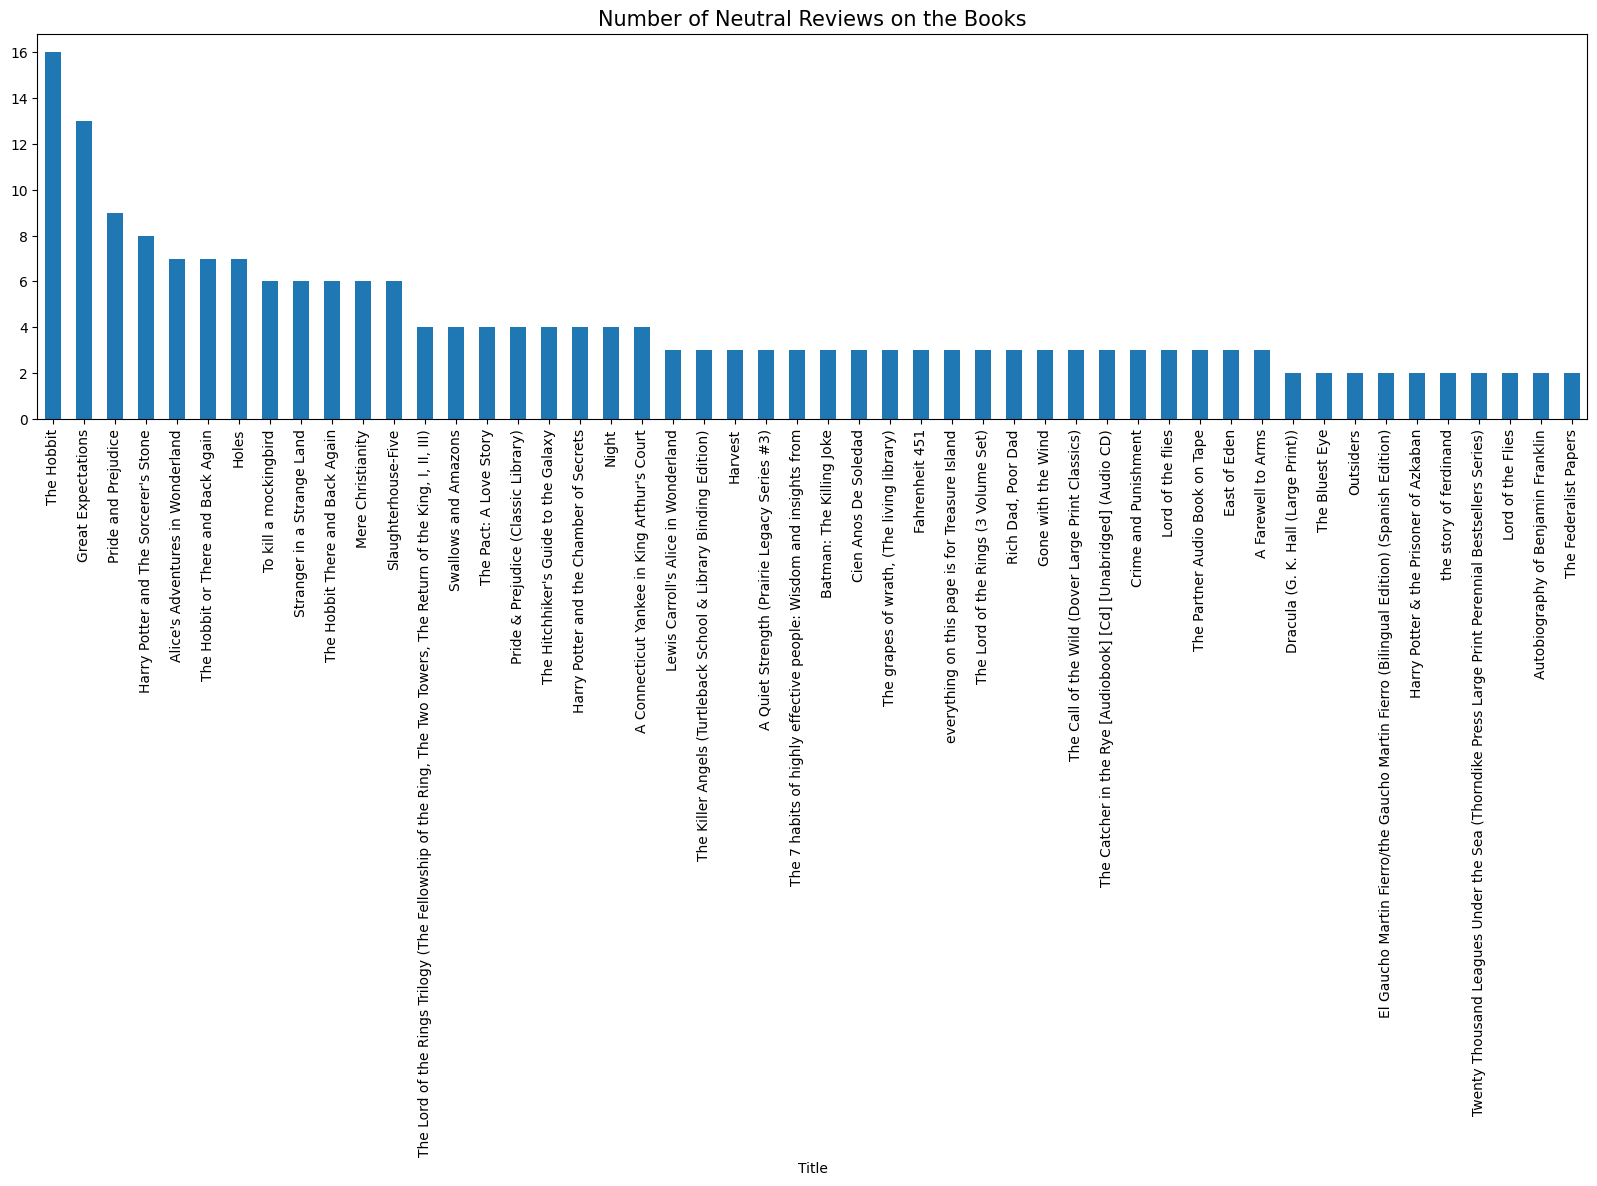

In [32]:
data[data['Sentiment'] == 'neutral']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (20,5))
plt.title('Number of Neutral Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

# Most number of **Negative** Reviews on the Books

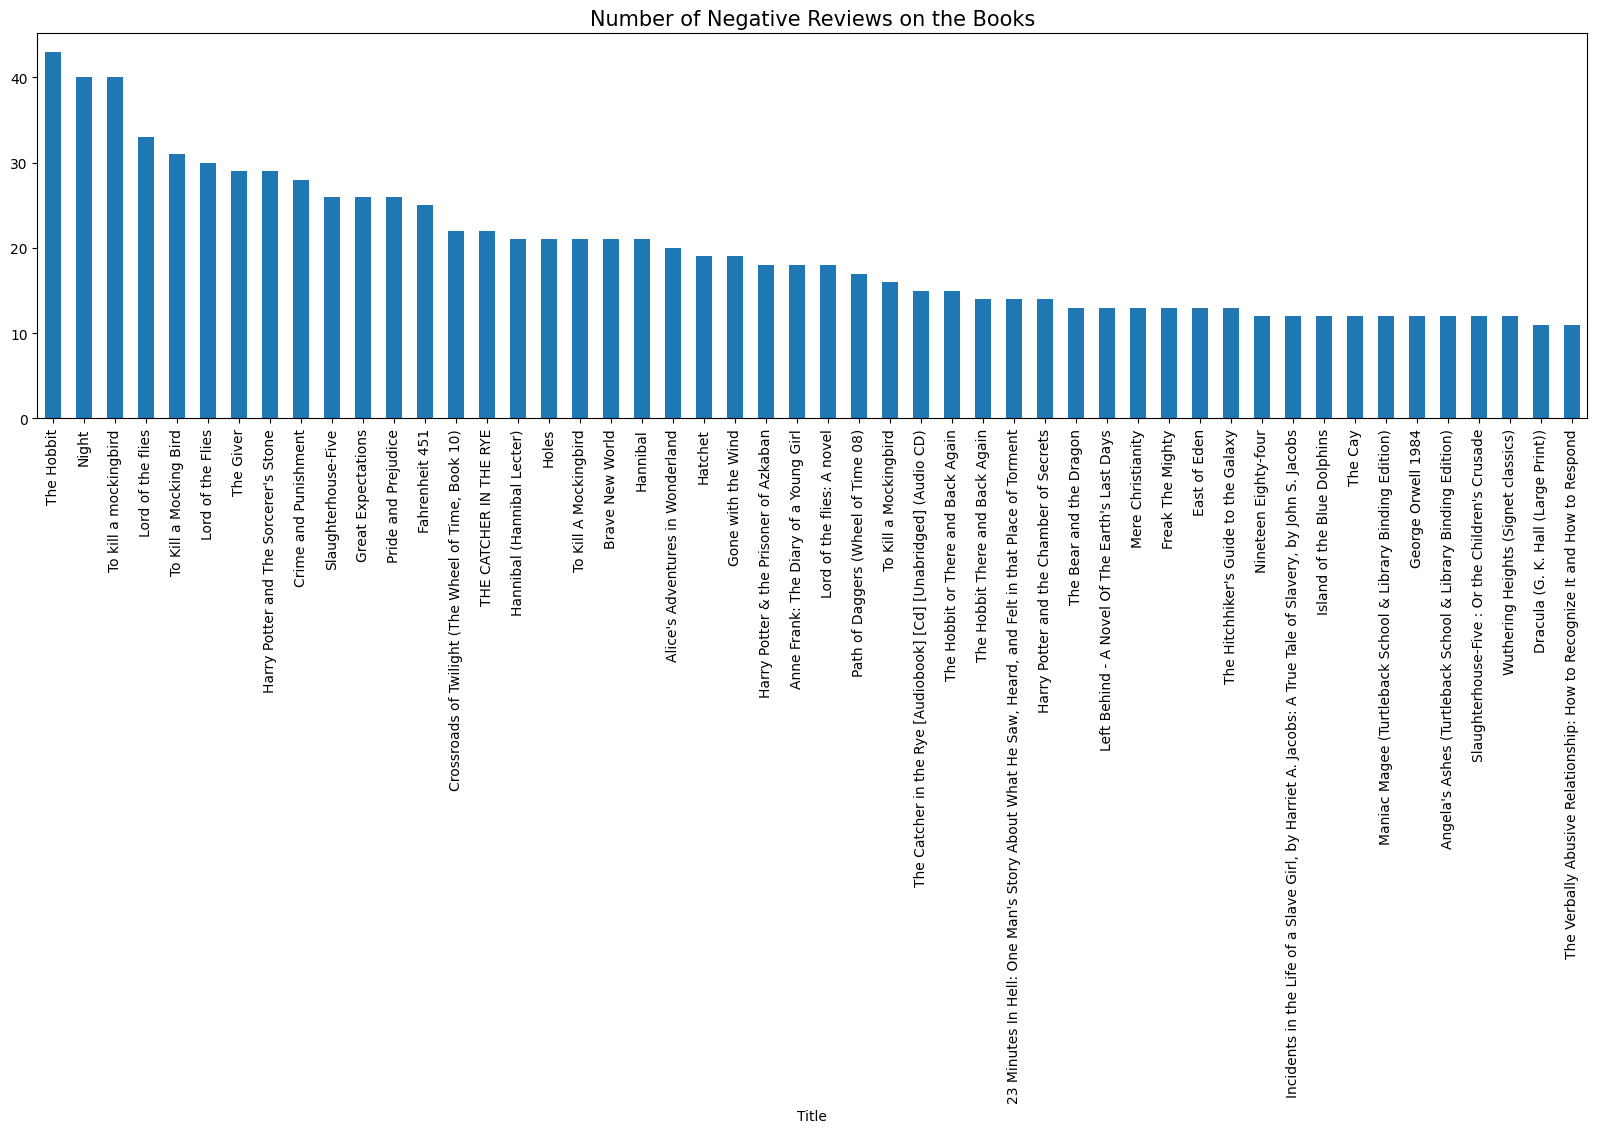

In [33]:
data[data['Sentiment'] == 'negative']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (20,5))
plt.title('Number of Negative Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

# ****Thank You!!****